In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DS105_Project/Dataset/Preparing/DataCleaning.csv")
display(f'(dong,cot) = {df.shape}')
display(f'Thuoc tinh {list(df.columns)}')
display(f'Mo ta co ban')
df.describe()

'(dong,cot) = (1213291, 26)'

"Thuoc tinh ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration', 'speed', 'covid', 'hour', 'PU_Borough', 'DO_Borough', 'airport']"

'Mo ta co ban'

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,speed,covid,hour,airport
count,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06
mean,1.877029e+00,1.063423e+00,1.075151e+02,1.281774e+02,1.222450e+00,3.864924e+00,1.574689e+01,6.887011e-01,3.843995e-01,9.887875e-01,3.563908e-01,2.938128e-01,1.879409e+01,1.563552e+00,1.014611e+00,3.515822e-01,1.200318e+03,1.331017e+01,3.091130e-01,1.357935e+01,1.232680e-02
std,3.284044e-01,4.927823e-01,7.071210e+01,7.612558e+01,8.319405e-01,4.413739e+00,1.280623e+01,1.048274e+00,2.108004e-01,2.269140e+00,1.545241e+00,4.263668e-02,1.424214e+01,5.113055e-01,1.199884e-01,9.182772e-01,4.532463e+03,6.644180e+00,4.621280e-01,5.519463e+00,1.103398e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.171543e-04,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.200000e+01,1.000000e+00,1.170000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.200000e+02,9.031802e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.280000e+02,1.000000e+00,2.200000e+00,1.145000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.412000e+01,2.000000e+00,1.000000e+00,0.000000e+00,7.200000e+02,1.150685e+01,0.000000e+00,1.400000e+01,0.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,4.720000e+00,2.034000e+01,1.000000e+00,5.000000e-01,1.760000e+00,0.000000e+00,3.000000e-01,2.412000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.235000e+03,1.566766e+01,1.000000e+00,1.800000e+01,0.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.088300e+02,7.530000e+02,1.455000e+01,5.000000e-01,6.412000e+02,9.612000e+01,3.000000e-01,7.538000e+02,5.000000e+00,2.000000e+00,2.750000e+00,8.639800e+04,4.999459e+01,1.000000e+00,2.300000e+01,1.000000e+00


##Biến mục tiêu tip_amount

In [ ]:
df.tip_amount.value_counts(normalize=True)*100

0.00     63.804232
2.75      3.459599
1.00      2.529731
2.00      1.838471
3.00      0.725053
           ...    
22.69     0.000082
23.32     0.000082
16.95     0.000082
24.01     0.000082
13.37     0.000082
Name: tip_amount, Length: 1911, dtype: float64

<small>**Note**:<br>
Số mẫu không có tiền boa chiếm hơn 50% bộ dữ liệu, mất cân bằng giá trị.
<br> Do đó, chúng tôi quyết định tạo thêm một **bộ nhỏ** chỉ chứa tiền boa > 0 để so sánh
</small> 

In [ ]:
big_df = df.copy()
small_df = df[df.tip_amount > 0].copy()

Một số thông tin cơ bản của 2 bộ

In [ ]:
#bộ nhỏ
display(small_df.describe())
#bộ gốc
big_df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,speed,covid,hour,airport
count,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.000000,439160.00000,439160.000000,439160.000000
mean,1.877052,1.046093,104.344239,136.079566,1.274829,3.284271,13.337196,0.430883,0.451704,2.731777,0.243741,0.299546,18.138338,1.000260,1.009507,0.687780,1090.253778,13.182384,0.33606,14.129611,0.022823
std,0.328378,0.416246,69.156562,77.273000,0.923409,3.673417,10.557124,0.661193,0.147700,3.076354,1.301664,0.011665,12.894033,0.023082,0.097038,1.190939,4662.546154,6.173532,0.47236,5.587490,0.149339
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,2.810000,1.000000,1.000000,0.000000,1.000000,0.000454,0.00000,0.000000,0.000000
25%,2.000000,1.000000,52.000000,70.000000,1.000000,1.170000,7.000000,0.000000,0.500000,1.560000,0.000000,0.300000,9.960000,1.000000,1.000000,0.000000,408.000000,9.230769,0.00000,10.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.030000,10.000000,0.000000,0.500000,2.300000,0.000000,0.300000,14.160000,1.000000,1.000000,0.000000,663.000000,11.617858,0.00000,15.000000,0.000000
75%,2.000000,1.000000,152.000000,213.000000,1.000000,3.870000,16.000000,0.500000,0.500000,3.060000,0.000000,0.300000,21.940000,1.000000,1.000000,2.750000,1055.000000,15.314868,1.00000,19.000000,0.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,55.480000,331.500000,14.260000,0.500000,641.200000,53.610000,0.300000,651.500000,4.000000,2.000000,2.750000,86392.000000,49.969231,1.00000,23.000000,1.000000


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,speed,covid,hour,airport
count,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06,1.213291e+06
mean,1.877029e+00,1.063423e+00,1.075151e+02,1.281774e+02,1.222450e+00,3.864924e+00,1.574689e+01,6.887011e-01,3.843995e-01,9.887875e-01,3.563908e-01,2.938128e-01,1.879409e+01,1.563552e+00,1.014611e+00,3.515822e-01,1.200318e+03,1.331017e+01,3.091130e-01,1.357935e+01,1.232680e-02
std,3.284044e-01,4.927823e-01,7.071210e+01,7.612558e+01,8.319405e-01,4.413739e+00,1.280623e+01,1.048274e+00,2.108004e-01,2.269140e+00,1.545241e+00,4.263668e-02,1.424214e+01,5.113055e-01,1.199884e-01,9.182772e-01,4.532463e+03,6.644180e+00,4.621280e-01,5.519463e+00,1.103398e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.171543e-04,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.200000e+01,1.000000e+00,1.170000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.200000e+02,9.031802e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.280000e+02,1.000000e+00,2.200000e+00,1.145000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.412000e+01,2.000000e+00,1.000000e+00,0.000000e+00,7.200000e+02,1.150685e+01,0.000000e+00,1.400000e+01,0.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,4.720000e+00,2.034000e+01,1.000000e+00,5.000000e-01,1.760000e+00,0.000000e+00,3.000000e-01,2.412000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.235000e+03,1.566766e+01,1.000000e+00,1.800000e+01,0.000000e+00
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,1.088300e+02,7.530000e+02,1.455000e+01,5.000000e-01,6.412000e+02,9.612000e+01,3.000000e-01,7.538000e+02,5.000000e+00,2.000000e+00,2.750000e+00,8.639800e+04,4.999459e+01,1.000000e+00,2.300000e+01,1.000000e+00


Độ phân bố giá trị tiền boa ở 2 bộ

In [ ]:
def tip_displot(df):
  f, (ax1, ax2) = plt.subplots(1, 2)
  f.set_figwidth(15, forward=True)
  ax1.set_title('Normal')
  sns.distplot(df.tip_amount, fit=norm, ax=ax1)
  ax2.set_title('Log Normal')
  sns.distplot(df.tip_amount, fit=lognorm, ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


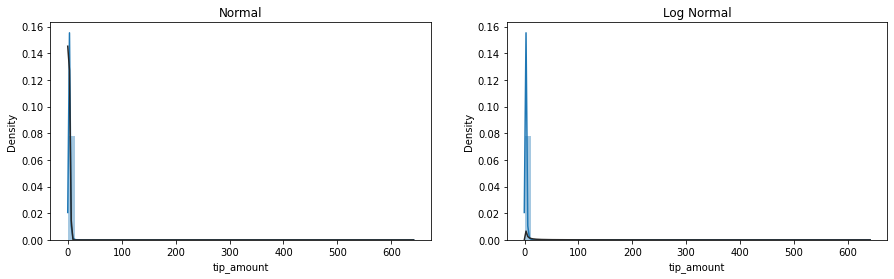

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


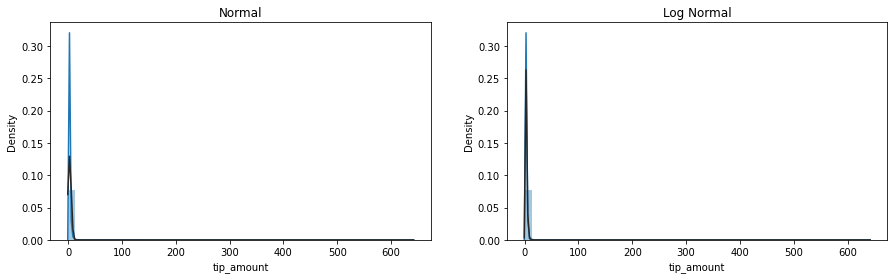

In [ ]:
#Bộ gốc
tip_displot(big_df)
plt.show()
#Bộ nhỏ
tip_displot(small_df)
plt.show()

#Độ tương quan giữa các đặc trưng 

In [ ]:
#Chia các đặc trưng thành 2 nhóm định tính và định lượng
qualitative = df.select_dtypes(include = 'object').columns.tolist()
quantitative = df.select_dtypes(include = np.number).columns.tolist()
quantitative.remove('tip_amount')
qualitative.remove('lpep_pickup_datetime')
qualitative.remove('lpep_dropoff_datetime')
#
ID = []
for i in df.columns:
  if 'ID' in i:
    ID.append(i)
ID = ID + ['covid',	'hour',	'airport','payment_type','trip_type','passenger_count','congestion_surcharge','mta_tax','improvement_surcharge']
for i in ID:
  quantitative.remove(i)
  qualitative.append(i)

In [ ]:
# Mã hóa các đặc trưng định tính
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'tip_amount']].groupby(feature).mean()['tip_amount']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []

big_df_encoded = big_df.copy()
for q in qualitative:  
    encode(big_df_encoded, q)
    qual_encoded.append(q + '_E')
qual_encoded.append('tip_amount')

small_df_encoded = small_df.copy()
for q in qualitative:  
    encode(small_df_encoded, q)

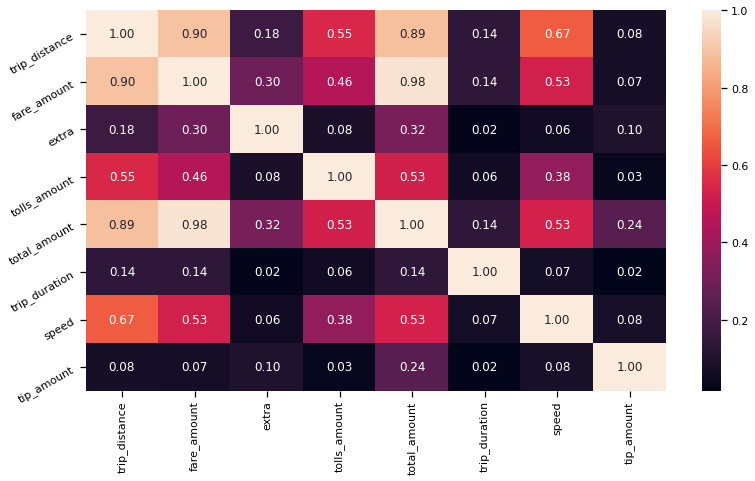

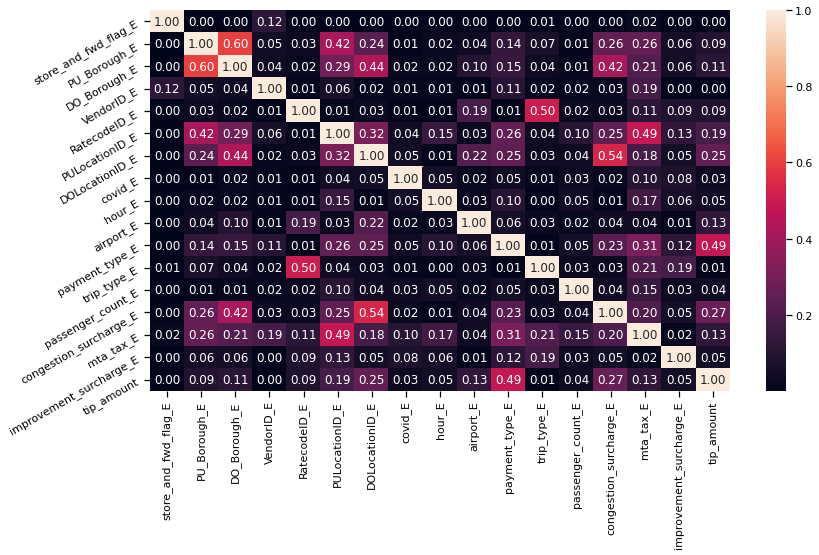

In [ ]:
#Heatmap độ tương quan giữa các đăc trưng
def Numerical_Heatmap(df):
  corr = df
  sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
  plt.figure(figsize=(13,7))
  a = sns.heatmap(corr, annot=True, fmt='.2f')
  rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
  roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
#Bộ lớn
Numerical_Heatmap(abs(big_df_encoded[quantitative + ['tip_amount']].corr(method = 'pearson')))
Numerical_Heatmap(abs(big_df_encoded[qual_encoded].corr(method = 'pearson')))

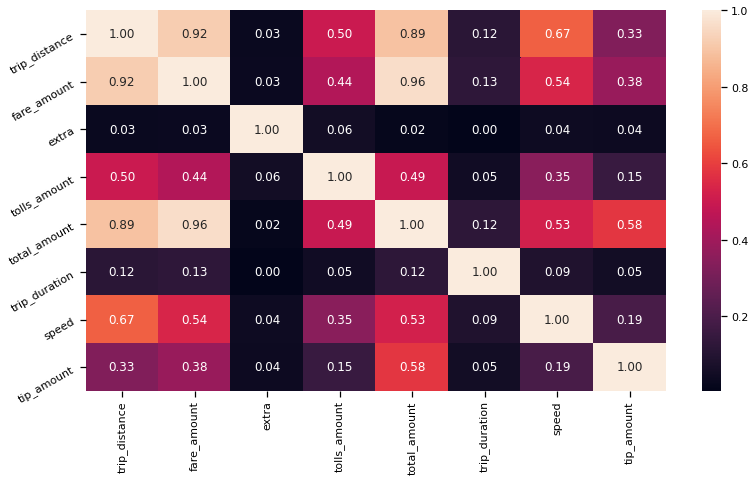

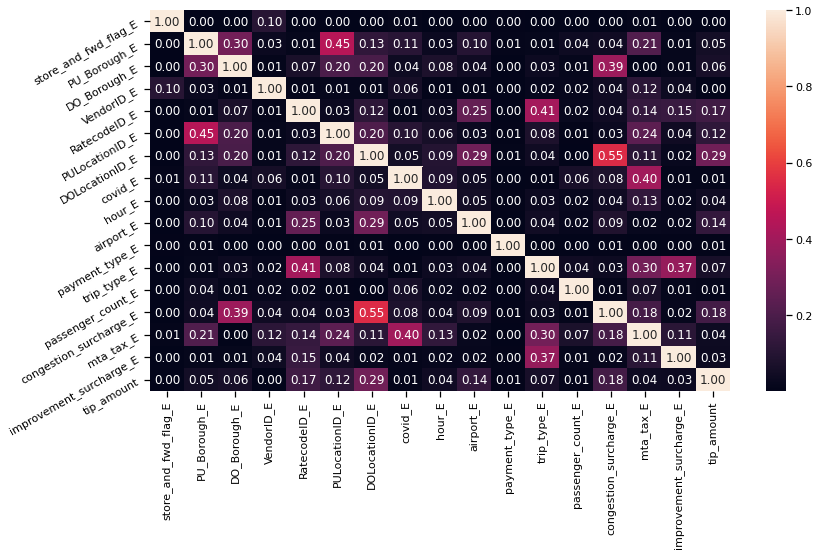

In [ ]:
#Bộ nhỏ
Numerical_Heatmap(abs(small_df_encoded[quantitative + ['tip_amount']].corr(method = 'pearson')))
Numerical_Heatmap(abs(small_df_encoded[qual_encoded].corr(method = 'pearson')))

In [ ]:
small_impo_feature = ['DOLocationID','total_amount','fare_amount','trip_distance','tip_amount']
big_impo_feature = ['DOLocationID','payment_type','congestion_surcharge','total_amount','tip_amount']

small_quantitative = ['total_amount','fare_amount','trip_distance']
big_quantitative = 'total_amount'

small_qualitative = ['DOLocationID']
big_qualitative = ['DOLocationID','payment_type','congestion_surcharge']

**Kiểm tra lại độ tương quan của những thuộc tính đã chọn bằng scatter plot, barplot**

Đặc trưng định lượng

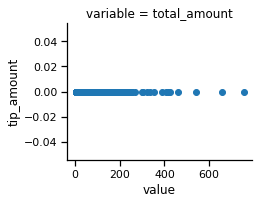

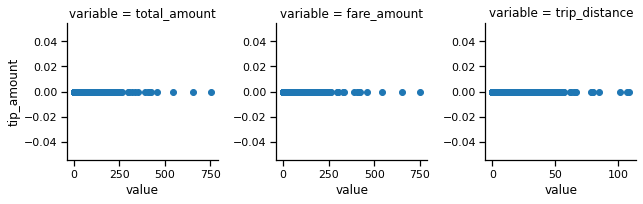

In [ ]:
#Tip_amount = 0
f = big_df[big_df.tip_amount == 0].melt(id_vars=['tip_amount'], value_vars = big_quantitative )
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'tip_amount')
plt.show()
f = big_df[big_df.tip_amount == 0].melt(id_vars=['tip_amount'], value_vars = small_quantitative )
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'tip_amount')
plt.show()

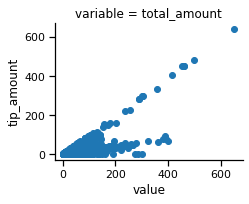

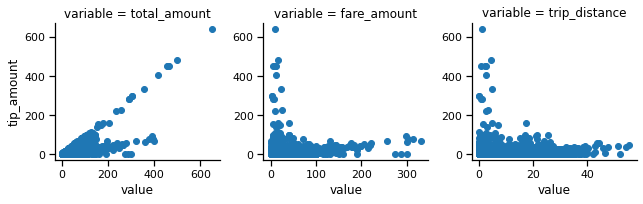

In [ ]:
#Tip_amount > 0
f = small_df.melt(id_vars=['tip_amount'], value_vars = big_quantitative )
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'tip_amount')
plt.show()
f = small_df.melt(id_vars=['tip_amount'], value_vars = small_quantitative )
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'tip_amount')
plt.show()

Đặc trưng định tính

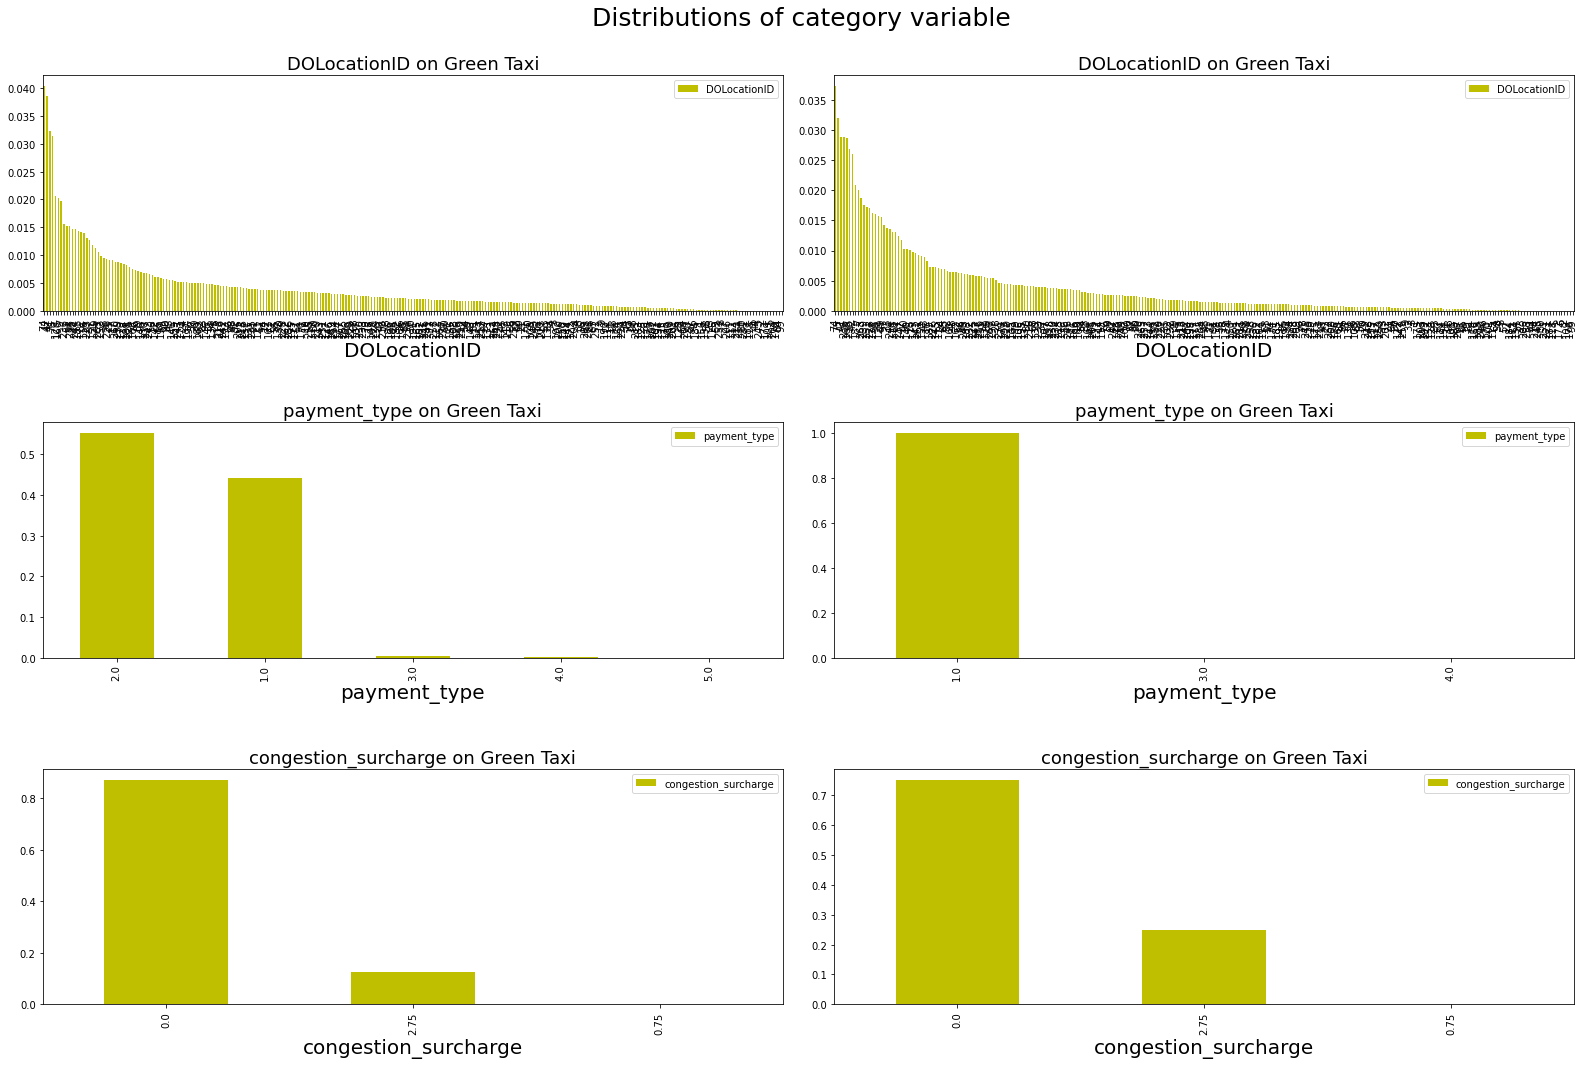

In [ ]:
def Category_Distribution(df,fe, ax):
    df[fe][df[fe].notnull()].value_counts(normalize = True).to_frame().plot(kind = 'bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(fe), fontsize=20)
    ax.set_title("{} on Green Taxi".format(fe), fontsize= 18)

f, ax = plt.subplots(3,2,figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])

for i in range(3):
  Category_Distribution(big_df,big_qualitative[i], ax[i][0])
  Category_Distribution(small_df,big_qualitative[i], ax[i][1])
__ = plt.suptitle("Distributions of category variable", fontsize= 25)

### Sư tương tác giữa các đặc trưng phát triển thêm với đặc trưng tiền boa

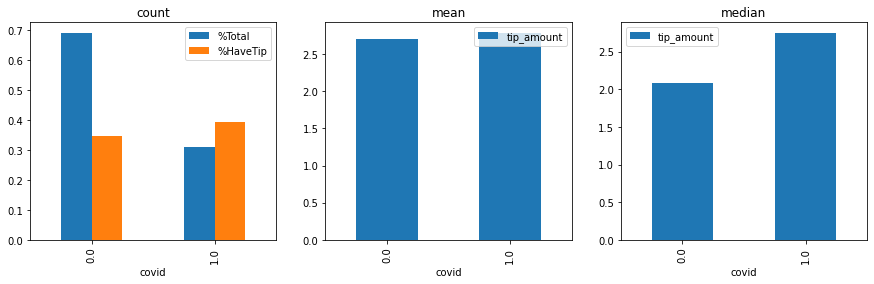

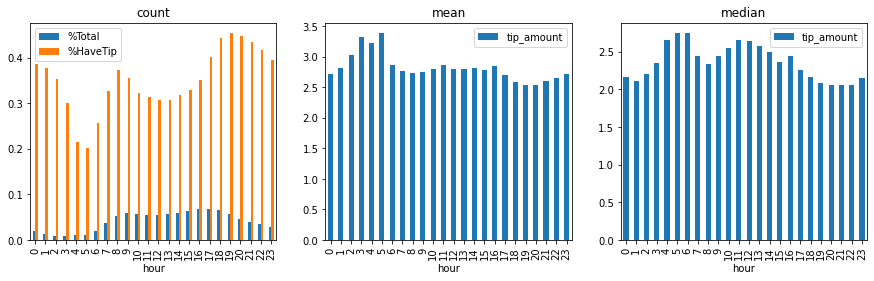

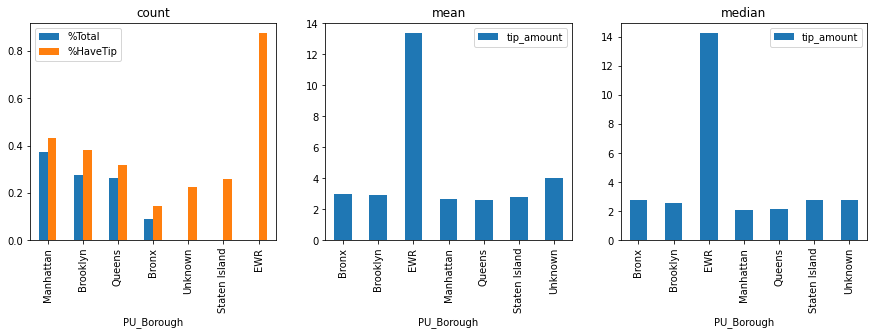

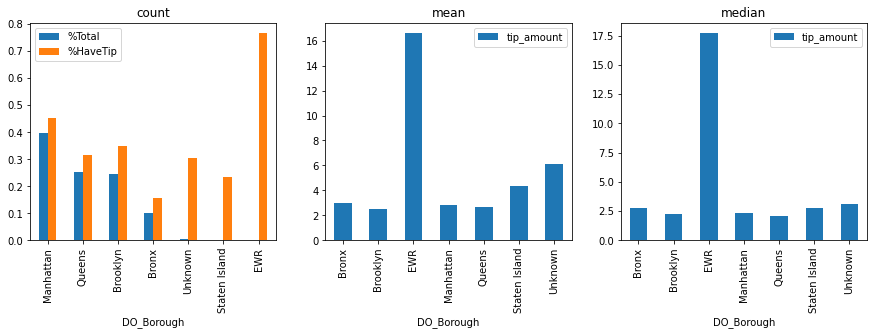

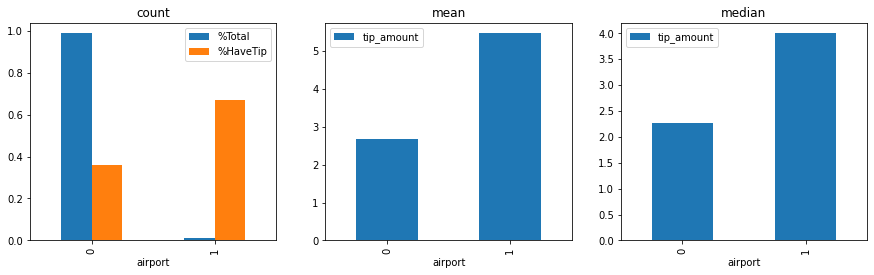

In [ ]:
df_ = small_df.copy()
dev_variable = df.columns[21:].to_list()
for var in dev_variable:
  total = pd.DataFrame({'%Total':big_df[var].value_counts(normalize = True)})
  HaveTip = pd.DataFrame({'%HaveTip':small_df[var].value_counts()/big_df[var].value_counts()})
  

  f, (ax1, ax2,ax3) = plt.subplots(1, 3)
  f.set_figwidth(15, forward=True)

  ax1.set_title('count')
  group_count = pd.concat([total,HaveTip],axis = 1)
  group_count.plot(y = ['%Total','%HaveTip'],use_index = True,kind = 'bar',ax = ax1,xlabel = var)

  ax2.set_title('mean')
  group_max = df_[[var] + ['tip_amount']].groupby(var).mean()
  group_max.plot.bar(ax = ax2)

  ax3.set_title('median')
  group_max = df_[[var] + ['tip_amount']].groupby(var).median()
  group_max.plot.bar(ax = ax3)

  plt.show()



In [ ]:
df_ = df.copy()
df_.loc[(df.hour <= 3)&(df.hour >= 0),'hour'] = '[0,3]'
df_.loc[(df.hour <= 6)&(df.hour >= 4),'hour'] = '[4,6]'
df_.loc[(df.hour <= 11)&(df.hour >= 7),'hour'] = '[7,11]'
df_.loc[(df.hour <= 16)&(df.hour >= 12),'hour'] = '[12,16]'
df_.loc[(df.hour >= 17),'hour'] = '[17,23]'



def split_data (df_ , sign,folder,impo_feature):
  for covid, airport in zip(df_.covid.unique(),df_.airport.unique()):
    df_[df_.covid == covid][impo_feature].to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/Covid/{folder}/{covid}{sign}.csv',index = False)
    df_[df_.airport == airport][impo_feature].to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/Airport/{folder}/{airport}{sign}.csv',index = False)
  for borough in df_.DO_Borough.unique():
    df_[df_.DO_Borough == borough][impo_feature].to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/DO_Borough/{folder}/{borough}{sign}.csv',index = False)
  for hour in df_.hour.unique():
    df_[df_.hour == hour][impo_feature].to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/Hour/{folder}/{hour}{sign}.csv',index = False)
  df_[impo_feature].to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Final{sign}.csv',index = False)
split_data(df_ ,'_full','Full',big_impo_feature)
split_data(df_[df_.tip_amount > 0] ,'_more_than_0','More_than_0',small_impo_feature)


#Chuẩn hóa đăc trưng định lượng

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


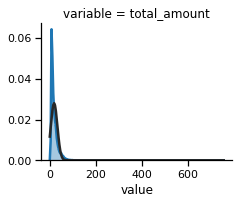

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

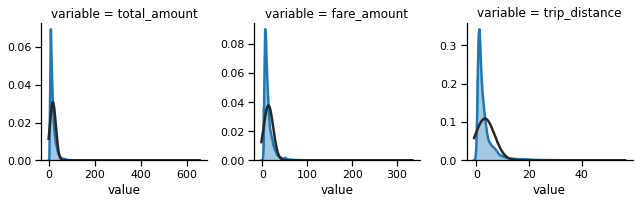

In [ ]:
def Distplot_norm(x,fit = norm,**kwargs):
  sns.distplot(x=x,fit = fit)

#Bộ lớn
f = pd.melt(big_df_, value_vars=big_quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(Distplot_norm, 'value')
plt.show()
#Bộ nhỏ
f = pd.melt(small_df_, value_vars=small_quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(Distplot_norm, 'value')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


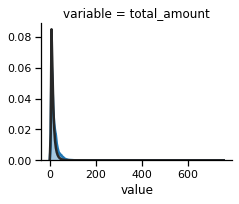

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

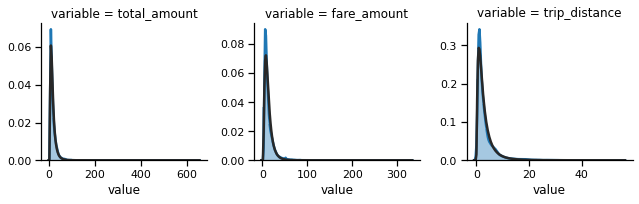

In [ ]:
def Distplot_lognorm(x,fit = lognorm,**kwargs):
  sns.distplot(x=x,fit = fit)
#Bộ lớn
f = pd.melt(big_df_, value_vars=big_quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(Distplot_lognorm, 'value')
plt.show()
#Bộ nhỏ
f = pd.melt(small_df_, value_vars=small_quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(Distplot_lognorm, 'value')
plt.show()